# Data Analysis and Visualization

## The Movie Rating Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

### Read Dataset

In [2]:
df = pd.read_csv('../Data/Movie-Ratings.csv')
df.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


### Data Dictionary:

   * **Film:** Movie name.
   * **Genre:** Genre of the movie.
   * **Rotten Tomatoes Rating:** Ratings from [link](https://it.wikipedia.org/wiki/Rotten_Tomatoes), from 0 to 100.
   * **Audience Rating:** Ratings from the audience, from 0 to 100.
   * **Budget Million:** Budget spent for the movie.
   * **Year of Release:** The year the movie was released.

## Dataset Exploration

#### Dataset info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 6 columns):
Film                         562 non-null object
Genre                        562 non-null object
Rotten Tomatoes Ratings %    562 non-null int64
Audience Ratings %           562 non-null int64
Budget (million $)           562 non-null int64
Year of release              562 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.4+ KB


#### Explore unique values on the Year column

In [19]:
df.Year.unique()

array([2009, 2008, 2010, 2007, 2011], dtype=int64)

#### Min Max on budget millions

In [20]:
df.Budget_Ml.min()

0

In [21]:
df.Budget_Ml.max()

300

#### Summary Statistic


In [3]:
df.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,562.000000,562.000000,562.000000,562.000000
mean,47.403915,58.830961,50.104982,2009.145907
std,26.392394,16.827792,48.638482,1.361578
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


### Rename the columns

In [4]:
# Get column names
df.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [5]:
# rename columns
df.columns = ['Film', 'Genre', 'Critic_R', 'Audience_R','Budget_Ml', 'Year']

In [6]:
# check the changes
df.columns

Index(['Film', 'Genre', 'Critic_R', 'Audience_R', 'Budget_Ml', 'Year'], dtype='object')

### Plotting the Audiance ratings against the Critic Ratings
Scatter plot

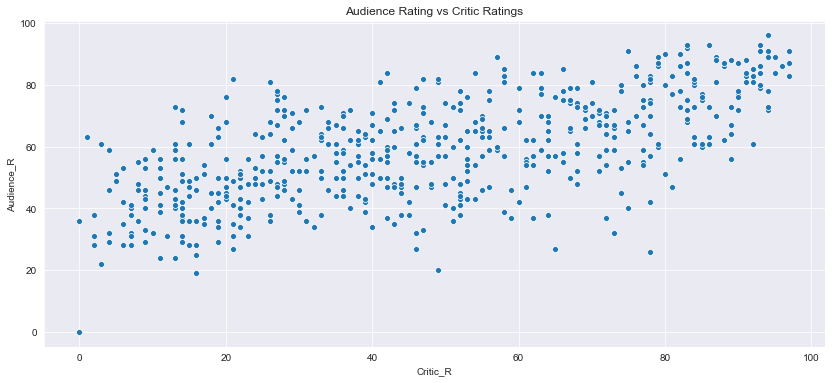

In [7]:
# set fig size
plt.figure(figsize=(14, 6))

# plot function
sns.scatterplot(data= df, x='Critic_R', y='Audience_R',)

# plot title
plt.title("Audience Rating vs Critic Ratings")

# show
plt.show()

#### Compute the Correlation

In [10]:
# check the correlation between the numeric variable
df[['Critic_R','Audience_R','Budget_Ml']].corrwith(df.Critic_R)

Critic_R      1.000000
Audience_R    0.654655
Budget_Ml     0.011755
dtype: float64

In [12]:
# corralate the budget 
df[['Critic_R','Audience_R','Budget_Ml']].corrwith(df.Budget_Ml)

Critic_R      0.011755
Audience_R    0.188078
Budget_Ml     1.000000
dtype: float64

### Plotting the Audiance ratings against the Critic Ratings colored by Genre
Scatter plot

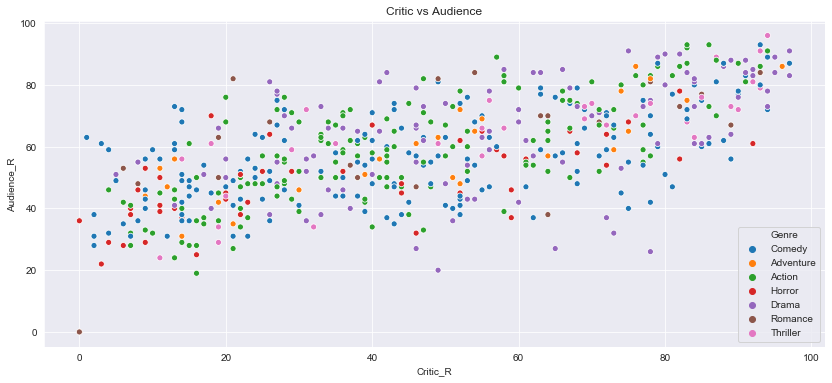

In [16]:
# fig size
fig = plt.figure(figsize=(14,6))

# plot function
sns.scatterplot(data=df, x='Critic_R', y='Audience_R', hue='Genre')

# title
plt.title("Critic vs Audience")

# show
plt.show()

In [15]:
df.head()

,Film,Genre,Critic_R,Audience_R,Budget_Ml,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


### Plotting the Audiance Ratings against the Critic Ratings colored by Genre and mapped by Budget_Ml$
Scatter plot

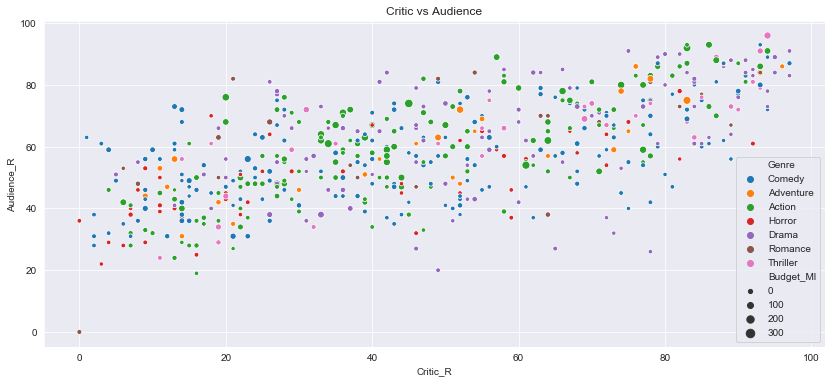

In [17]:
# fig size
fig = plt.figure(figsize=(14,6))

# plot function
sns.scatterplot(data=df, x='Critic_R', y='Audience_R', hue='Genre', size='Budget_Ml')

# title
plt.title('Critic vs Audience')

# show
plt.show()

### Plotting the Audience Rating by Genre
Categorical plot

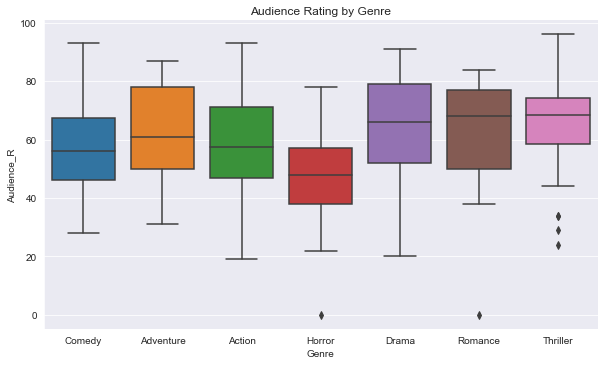

In [25]:
# plot function (kind=box)
# https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

sns.catplot(data=df, x='Genre', y='Audience_R', kind='box', height=5, aspect=1.7)

# plot title
plt.title("Audience Rating by Genre")

# show
plt.show()

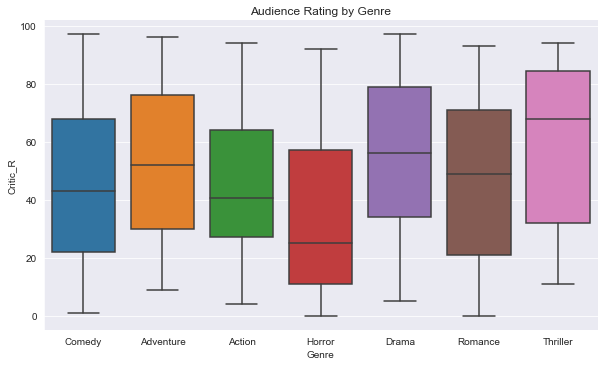

In [26]:
# plot function (kind=box)
sns.catplot(data=df, x='Genre', y='Critic_R', kind='box', height=5, aspect=1.7)

# plot title
plt.title("Audience Rating by Genre")

# show
plt.show()

### Plotting Budget Distribution

Univariate distribution plot

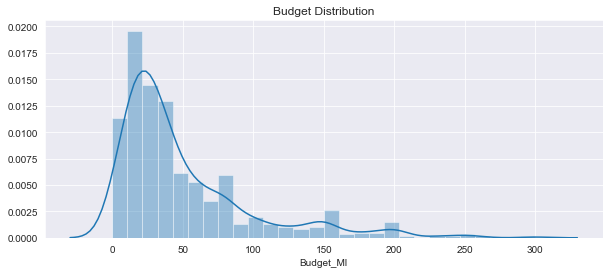

In [27]:
# set the fig size
plt.figure(figsize=(10,4))

# plot function
sns.distplot(df['Budget_Ml'])

# plot title
plt.title('Budget Distribution')

# show
plt.show()

### Budget Distribution by Genre
Use of the FacetGrid with the Map functions.

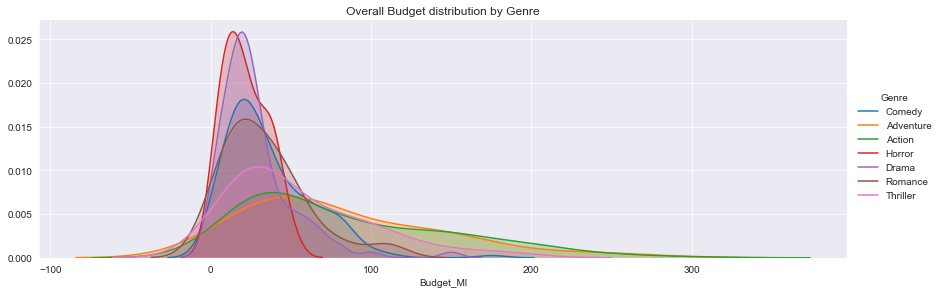

In [34]:
# set the facet grid
g = sns.FacetGrid(data=df, hue='Genre', height=4, aspect=3) #HINT: Try row='Genre'

# map the faced grid with function
g.map(sns.kdeplot, 'Budget_Ml', shade=True)

# Adding the legend
g.add_legend()

# plot title
plt.title('Overall Budget distribution by Genre')
# plot title
plt.show()

### Budget spent per every movie evary year

Categorical plot

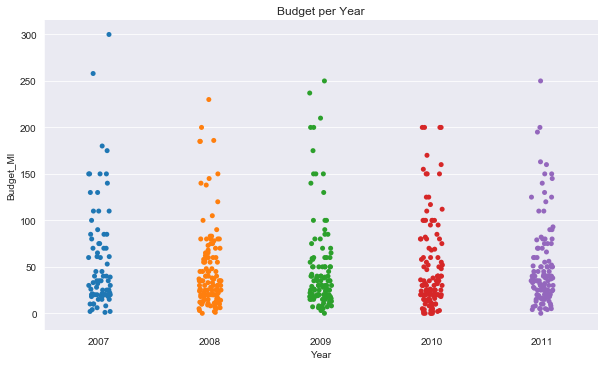

In [31]:
# plot finction
sns.catplot(data=df, x='Year', y='Budget_Ml', ci=None, height=5, aspect=1.7)

# plot title
plt.title('Budget per Year')

# show
plt.show()

### Budget spent per every movie evary year

Categorical plot **(hue='Genre')**

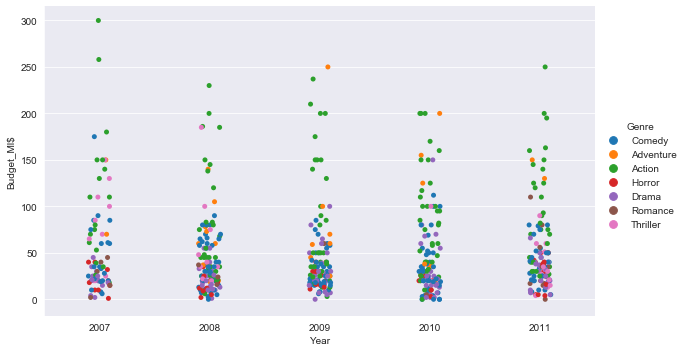

In [166]:
# plot finction
sns.catplot(data=df, x='Year', y='Budget_Ml$', hue='Genre', ci=None, height=5, aspect=1.7)

# show
plt.show()

### Budget spent per every movie evary year

Box plot

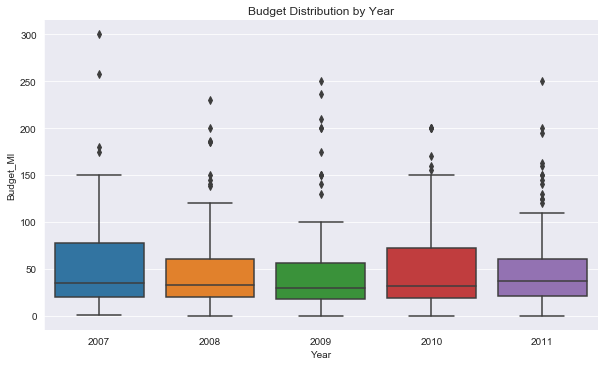

In [228]:
# plt function
sns.catplot(data=df, x='Year', y='Budget_Ml', kind='box', height=5, aspect=1.7)

# plot title
plt.title('Budget Distribution by Year')

# plot 
plt.show()

Box Plot mapped by Genre

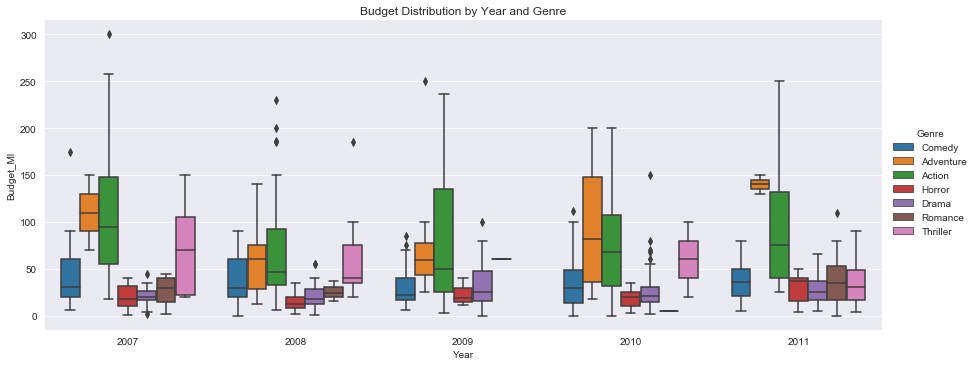

In [234]:
# plt function
sns.catplot(data=df, x='Year', y='Budget_Ml', kind='box', height=5, aspect=2.5, hue='Genre')

# plot title
plt.title('Budget Distribution by Year and Genre')

# plot 
plt.show()

### Average of the badget spent for every year

Categorical plot **(kind='point')**

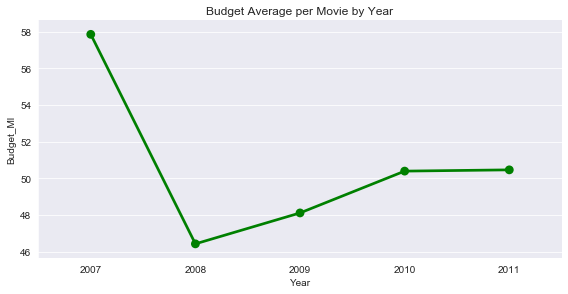

In [235]:
# plot function
sns.catplot(data=df, x='Year', y='Budget_Ml', kind='point', ci=None, height=4, aspect=2, color='green')

# plot title
plt.title('Budget Average per Movie by Year')

# show
plt.show()

#### Another way to visualize the budget average per year
The **Bar Plot:** Represents an **estimate of central tendency for a numeric variable** with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

In this case we use the with the default estimator parameter: the **mean** 

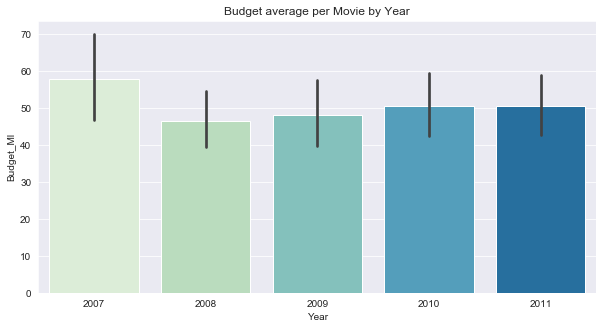

In [239]:
# fig setting
plt.figure(figsize=(10,5))

# plot function
sns.barplot(data=df, x='Year', y='Budget_Ml', palette='GnBu') # estimator = mean

# plot title
plt.title('Budget average per Movie by Year')

# show
plt.show()

### Total budget spent every year

Here we change the estimator parameter: the **sum**

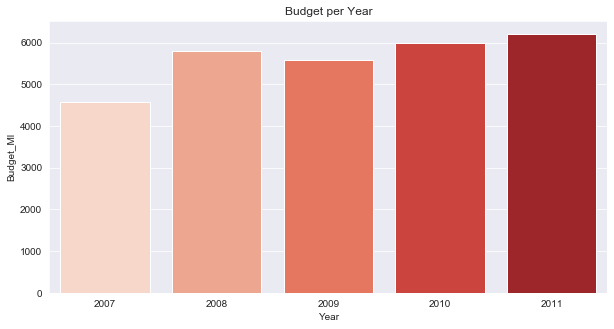

In [240]:
# fig setting
plt.figure(figsize=(10,5))

# plot function (sum estimator)
sns.barplot(data=df, x='Year', y='Budget_Ml', estimator=np.sum, ci=None, palette='Reds')

# plot title
plt.title('Budget per Year')

# show
plt.show()

## Compare the total budget spent per year and number of movies released per year

First we create a new df with the function groupby, than we plot it.

In [241]:
# new df
df_film = df.groupby(['Year']).count()

# reset the index
df_film.reset_index(inplace=True)

#show
df_film.head()

,Year,Film,Genre,Critic_R,Audience_R,Budget_Ml
0,2007,79,79,79,79,79
1,2008,125,125,125,125,125
2,2009,116,116,116,116,116
3,2010,119,119,119,119,119
4,2011,123,123,123,123,123


#### Subplots method

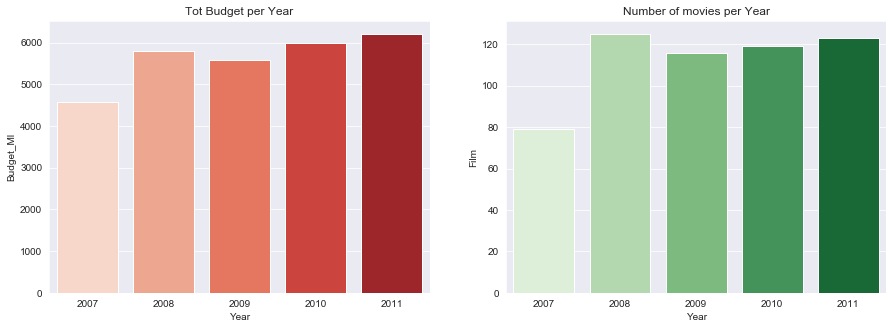

In [243]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 5), sharex=True, sharey=False)

# working on the first image axes[0]
sns.barplot(data=df, x='Year', y='Budget_Ml', estimator=np.sum, ci=None, ax=axes[0], palette='Reds')
# set fig1 title
axes[0].set_title('Tot Budget per Year')

# working on the second image axes[1]
sns.barplot(data=df_film, x='Year', y='Film', estimator=np.sum, ci=None, ax=axes[1], palette='Greens')

# set fig 2 title
axes[1].set_title('Number of movies per Year')

plt.show()

### Total budget sent every year for every genre

Bar plot

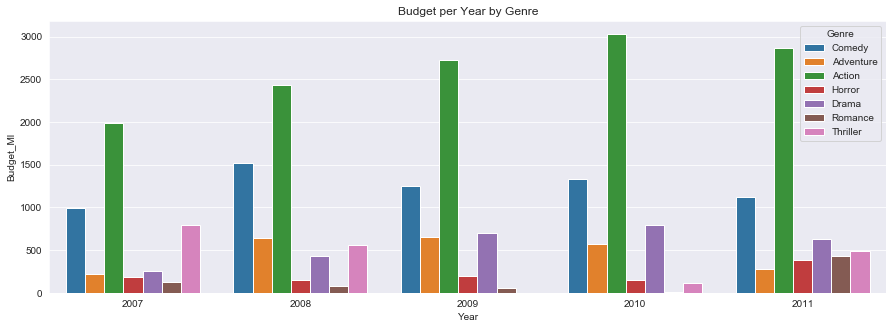

In [244]:
# fig size
plt.figure(figsize=(15,5))

# plot function
sns.barplot(data=df, x='Year', y='Budget_Ml',hue='Genre',ci=None, estimator=np.sum)

# title
plt.title('Budget per Year by Genre')

# show
plt.show()

In [248]:
df.head()

,Film,Genre,Critic_R,Audience_R,Budget_Ml,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


# Linear Regression Analysis

In [294]:
df['Revenue'] = df['Budget_Ml'] + (df['Budget_Ml']*1.5) + (df['Audience_R']*3)

In [295]:
df.head()

,Film,Genre,Critic_R,Audience_R,Budget_Ml,Year,Revenue
0,(500) Days of Summer,Comedy,87,81,8,2009,263.0
1,"10,000 B.C.",Adventure,9,44,105,2008,394.5
2,12 Rounds,Action,30,52,20,2009,206.0
3,127 Hours,Adventure,93,84,18,2010,297.0
4,17 Again,Comedy,55,70,20,2009,260.0


### Analyze the Revenue Correlations

In [296]:
df[['Critic_R','Audience_R','Budget_Ml']].corrwith(df.Revenue)

Critic_R      0.246004
Audience_R    0.523372
Budget_Ml     0.935332
dtype: float64

#### Build the correlation Matrix

In [302]:
corr = df[['Critic_R','Audience_R','Budget_Ml', 'Revenue']].corr()
corr

,Critic_R,Audience_R,Budget_Ml,Revenue
Critic_R,1.000000,0.654655,0.011755,0.246004
Audience_R,0.654655,1.000000,0.188078,0.523372
Budget_Ml,0.011755,0.188078,1.000000,0.935332
Revenue,0.246004,0.523372,0.935332,1.000000


#### Plot the corelation matrix

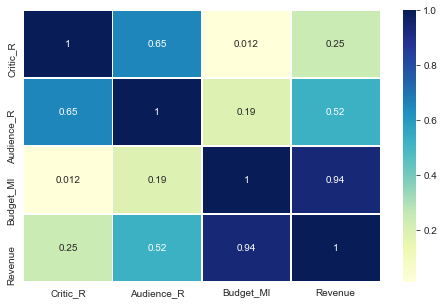

In [306]:
fig = plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")
plt.show()

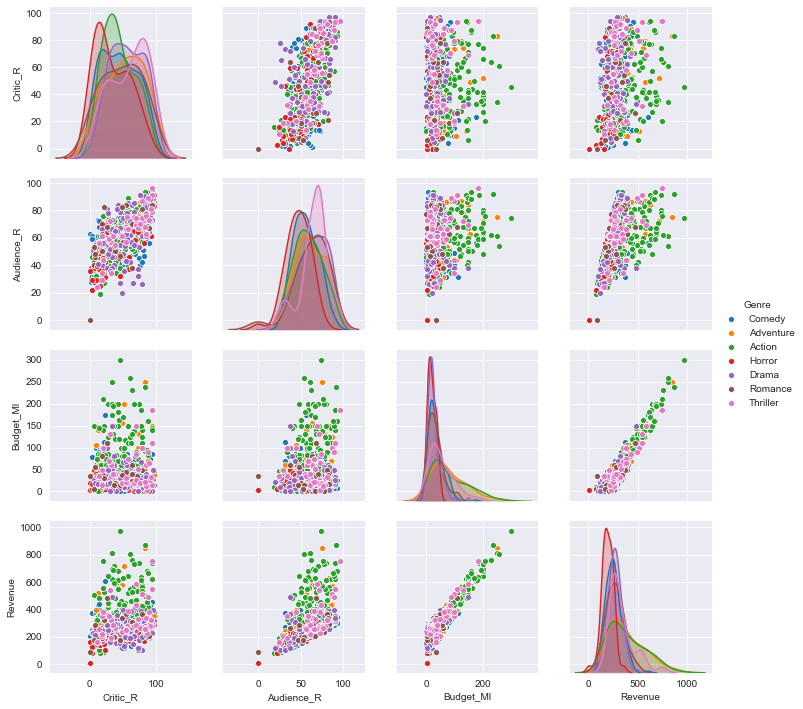

In [289]:
cols= ['Critic_R','Audience_R','Budget_Ml','Revenue','Genre']

sns.pairplot(df[cols], hue='Genre')
plt.show()

### Plot the Linear Regression

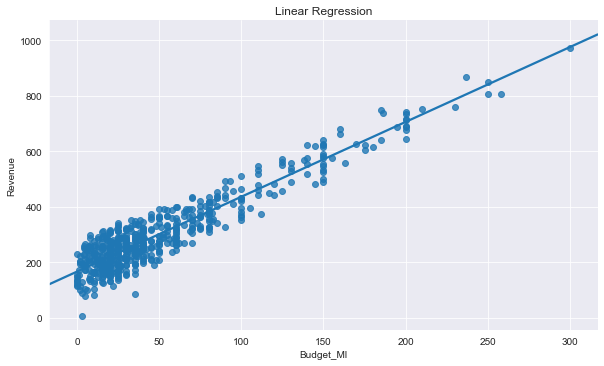

In [308]:
# plot function
sns.lmplot(data=df, x='Budget_Ml', y='Revenue',ci=None, aspect=1.7)

# title
plt.title('Linear Regression')

#show
plt.show()

In [316]:
df.head()

,Film,Genre,Critic_R,Audience_R,Budget_Ml,Year,Revenue
0,(500) Days of Summer,Comedy,87,81,8,2009,263.0
1,"10,000 B.C.",Adventure,9,44,105,2008,394.5
2,12 Rounds,Action,30,52,20,2009,206.0
3,127 Hours,Adventure,93,84,18,2010,297.0
4,17 Again,Comedy,55,70,20,2009,260.0


df.to_csv('../Data/reg_movie_ratings.csv', index=False)